# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | borba
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | al bawiti
Processing Record 5 of Set 1 | mujiayingzi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | nagqu
Processing Record 9 of Set 1 | tralee
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | puerto iguazu
Processing Record 13 of Set 1 | oriximina
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | troitsko-pechorsk
Processing Record 16 of Set 1 | sumy
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | katabu
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | toungo
Processing Record 21 of Set 1 | kyrenia
Processing Record 22 of Set 1 | qamdo
Processing Record 23 of Set 1 | regg

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borba,-4.3878,-59.5939,303.01,84,71,0.90,BR,1713899945
1,port-aux-francais,-49.3500,70.2167,277.40,68,38,16.96,TF,1713899946
2,constitucion,-35.3333,-72.4167,290.84,44,0,6.46,CL,1713899946
3,al bawiti,28.3492,28.8659,302.42,9,0,2.81,EG,1713899947
4,mujiayingzi,42.1167,118.7833,277.26,71,0,3.04,CN,1713899948


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borba,-4.3878,-59.5939,303.01,84,71,0.90,BR,1713899945
1,port-aux-francais,-49.3500,70.2167,277.40,68,38,16.96,TF,1713899946
2,constitucion,-35.3333,-72.4167,290.84,44,0,6.46,CL,1713899946
3,al bawiti,28.3492,28.8659,302.42,9,0,2.81,EG,1713899947
4,mujiayingzi,42.1167,118.7833,277.26,71,0,3.04,CN,1713899948


In [6]:
# Export the City_Data into a csv
output_data_file = "weather_data_cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(output_data_file , index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borba,-4.3878,-59.5939,303.01,84,71,0.90,BR,1713899945
1,port-aux-francais,-49.3500,70.2167,277.40,68,38,16.96,TF,1713899946
2,constitucion,-35.3333,-72.4167,290.84,44,0,6.46,CL,1713899946
3,al bawiti,28.3492,28.8659,302.42,9,0,2.81,EG,1713899947
4,mujiayingzi,42.1167,118.7833,277.26,71,0,3.04,CN,1713899948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#  Create fields needed for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

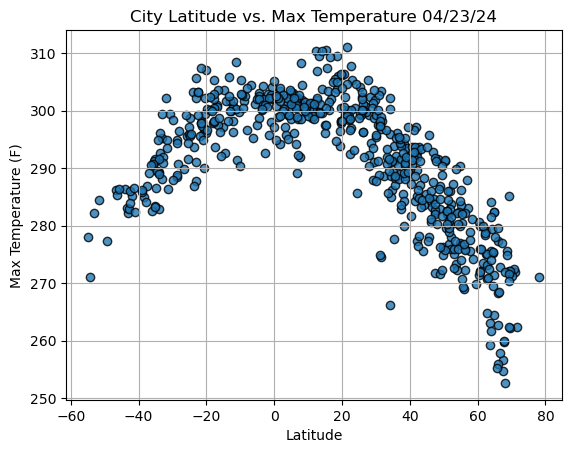

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

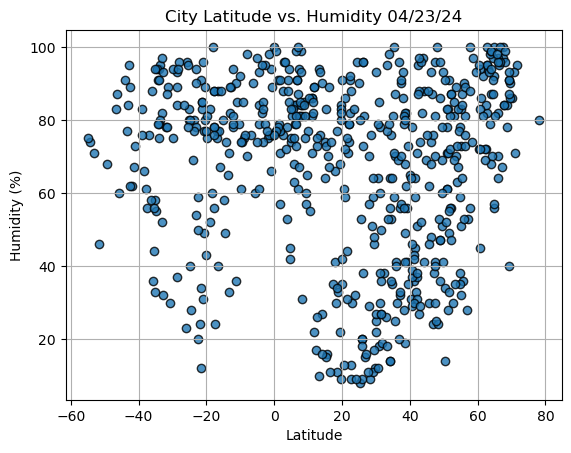

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

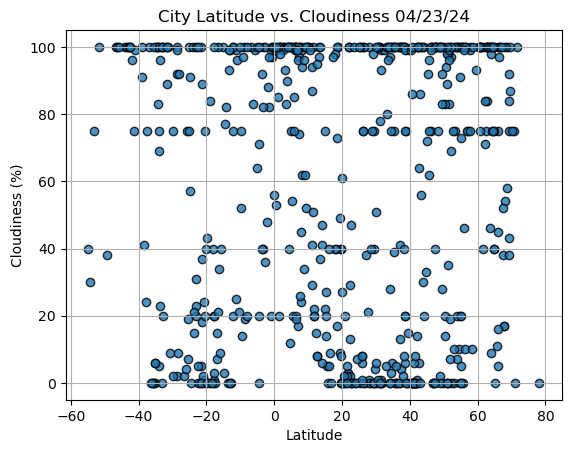

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

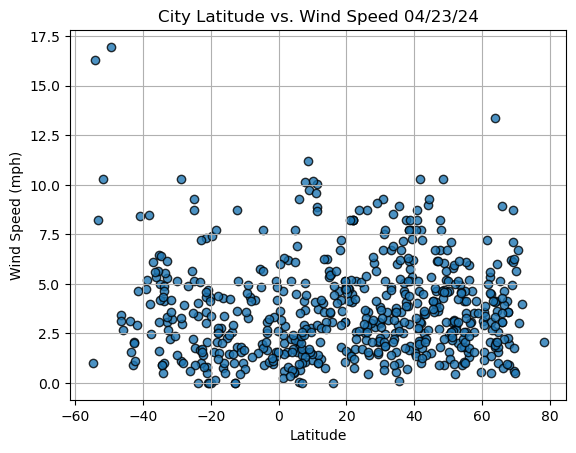

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,al bawiti,28.3492,28.8659,302.42,9,0,2.81,EG,1713899947
4,mujiayingzi,42.1167,118.7833,277.26,71,0,3.04,CN,1713899948
6,sitka,57.0531,-135.3300,283.09,53,75,4.63,US,1713899950
7,nagqu,31.5000,92.0000,274.62,36,93,1.86,CN,1713899951
8,tralee,52.2704,-9.7026,283.79,87,97,2.87,IE,1713899861


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borba,-4.3878,-59.5939,303.01,84,71,0.90,BR,1713899945
1,port-aux-francais,-49.3500,70.2167,277.40,68,38,16.96,TF,1713899946
2,constitucion,-35.3333,-72.4167,290.84,44,0,6.46,CL,1713899946
5,grytviken,-54.2811,-36.5092,271.05,74,30,16.32,GS,1713899948
10,blackmans bay,-43.0167,147.3167,282.22,84,100,0.89,AU,1713899954


###  Temperature vs. Latitude Linear Regression Plot

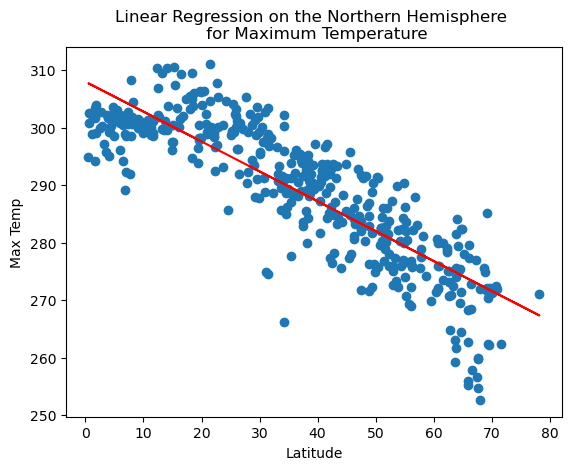

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

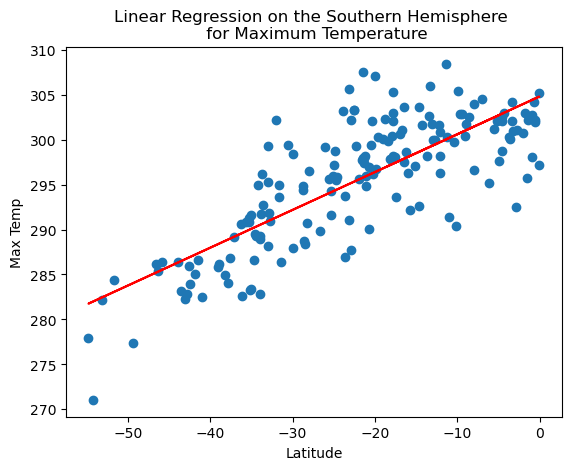

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#In the Soutnern Hemisphere there is a positive correlation between the latitude and temperature axis. 

### Humidity vs. Latitude Linear Regression Plot

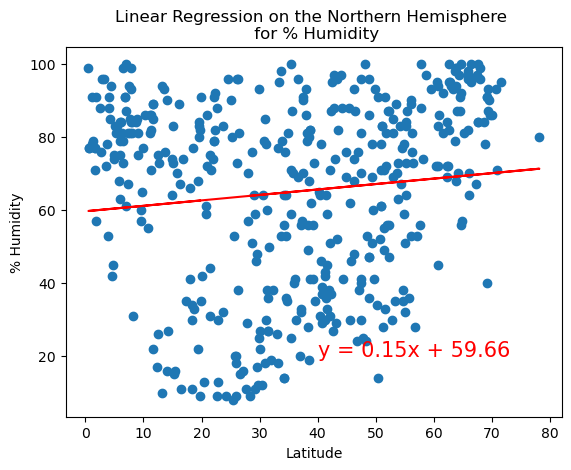

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

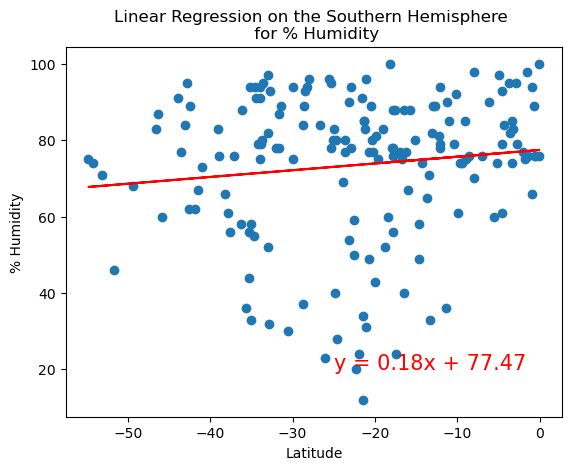

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#There is a positive relationship between x and y. For every unit increase in latitude, the humidity will go up .18

### Cloudiness vs. Latitude Linear Regression Plot

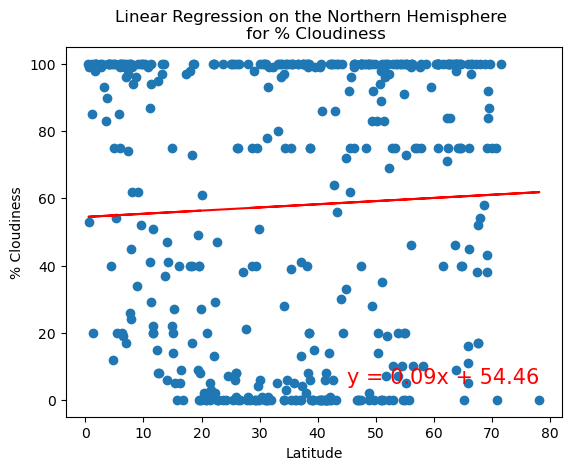

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

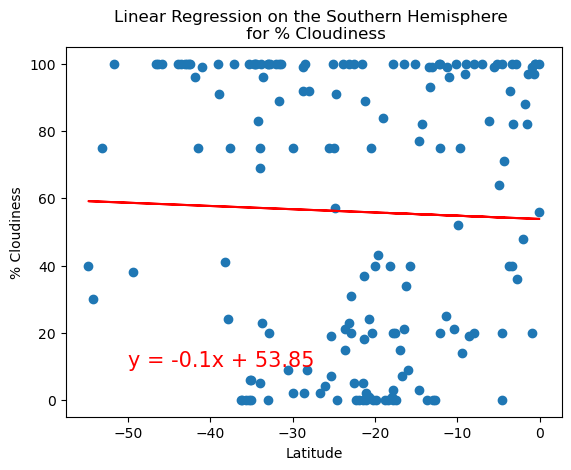

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#There is a negative relationship between x and y. For every unit increase in latitude, the cloudiness will go down .1

### Wind Speed vs. Latitude Linear Regression Plot

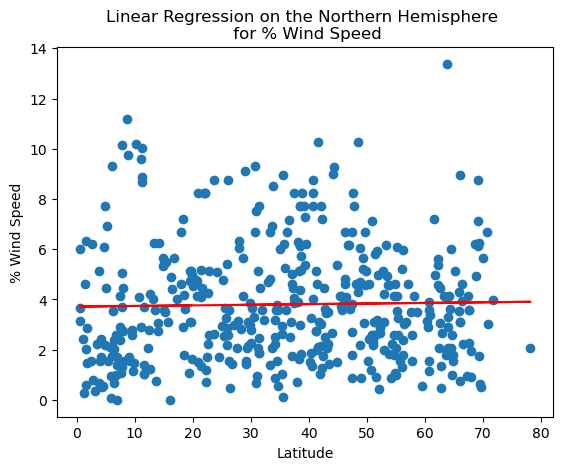

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

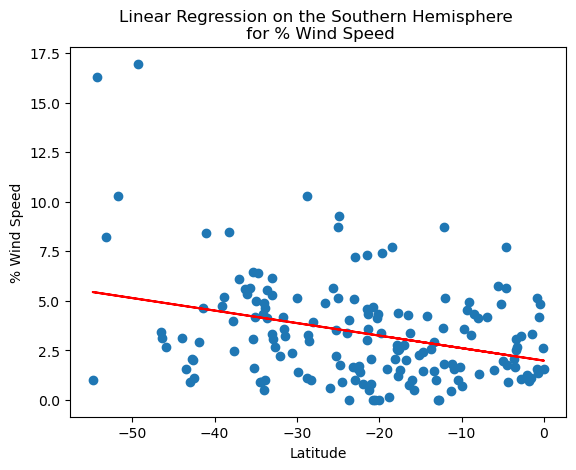

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#In the Southern Hemisphere there is a negative relationship between latitude and wind speed. 